In [1]:
import tensorflow as tf
from tensorflow import  keras
from tensorflow.keras import  layers
import matplotlib.pyplot as plt
%matplotlib inline

# 一个简单的全连接神经网络

In [2]:
# 分如下几个步骤
# 加载数据集
# 构造模型/编译模型
# 训练模型


In [3]:
# 我这里也是加载MNIST数据集吧。
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [16]:
# 构造模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),   # 这个先是展平操作
  tf.keras.layers.Dense(128, activation='relu'),   # 全连接层
  tf.keras.layers.Dropout(0.2),                    # 随机丢弃一些数据
  tf.keras.layers.Dense(10, activation='softmax')  # 全连接层，用softmax
])
# 编译模型
model.compile(optimizer='adam',                        # 优化器
              loss='sparse_categorical_crossentropy',  # 损失函数
              metrics=['accuracy'])

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 19s 353us/sample - loss: 0.3129 - accuracy: 0.9096 - val_loss: 0.1268 - val_accuracy: 0.9657
Epoch 2/5
54000/54000 [==============================] - 11s 206us/sample - loss: 0.1504 - accuracy: 0.9551 - val_loss: 0.0972 - val_accuracy: 0.9725
Epoch 3/5
54000/54000 [==============================] - 11s 198us/sample - loss: 0.1135 - accuracy: 0.9668 - val_loss: 0.0850 - val_accuracy: 0.9752
Epoch 4/5
54000/54000 [==============================] - 11s 200us/sample - loss: 0.0921 - accuracy: 0.9716 - val_loss: 0.0755 - val_accuracy: 0.9777
Epoch 5/5
54000/54000 [==============================] - 11s 196us/sample - loss: 0.0790 - accuracy: 0.9756 - val_loss: 0.0722 - val_accuracy: 0.9783
10000/10000 - 2s - loss: 0.0752 - accuracy: 0.9774


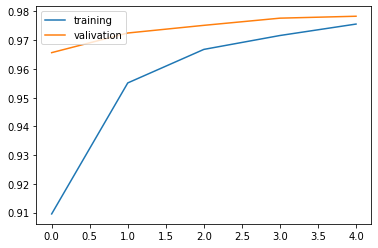

In [17]:
# 训练并验证模型
history =model.fit(x_train, y_train, epochs=5,validation_split=0.1)      # 训练模型，epochs指的就是训练过程中数据将被“轮”多少次
model.evaluate(x_test,  y_test, verbose=2) # 验证模型,verbose = 2 为每个epoch输出一行记录
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')

# 一个简单的卷积神经网络

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 27s 497us/sample - loss: 0.1534 - accuracy: 0.9530 - val_loss: 0.0461 - val_accuracy: 0.9853
Epoch 2/5
54000/54000 [==============================] - 23s 435us/sample - loss: 0.0497 - accuracy: 0.9845 - val_loss: 0.0399 - val_accuracy: 0.9877
Epoch 3/5
54000/54000 [==============================] - 22s 417us/sample - loss: 0.0347 - accuracy: 0.9889 - val_loss: 0.0330 - val_accuracy: 0.9903
Epoch 4/5
54000/54000 [==============================] - 24s 449us/sample - loss: 0.0271 - accuracy: 0.9915 - val_loss: 0.0309 - val_accuracy: 0.9907
Epoch 5/5
54000/54000 [==============================] - 29s 542us/sample - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.0372 - val_accuracy: 0.9893
10000/10000 - 2s - loss: 0.0330 - accuracy: 0.9906


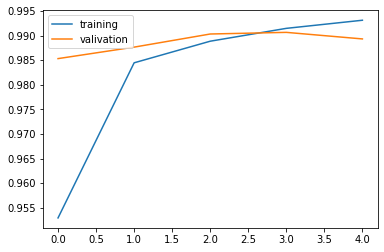

In [18]:
# 这里还是用手写字体来识别吧，不过不同的是，这里换成卷积神经网络。
# 卷积神经网络是用Conv2D这个卷积和MaxPooling2D这个池化来处理数据的。
model_conv2d=tf.keras.models.Sequential([
    # 第1层卷积，卷积核大小为3*3，32个，28*28为待训练图片的大小
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    # 第2层卷积，卷积核大小为3*3，64个
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # 第3层卷积，卷积核大小为3*3，64个
    layers.Conv2D(64, (3, 3), activation='relu'),
    # 展平,原先是矩阵，现在要变成向量
    layers.Flatten(),
    # 如下用2个全连接层
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_conv2d.compile(optimizer='adam',                        # 优化器
              loss='sparse_categorical_crossentropy',  # 损失函数
              metrics=['accuracy'])
# 数据集要更改尺寸,原先是每一个都是28*28的图像，现在要加上一个高度
x_train_2 = x_train.reshape((-1,28,28,1))
x_test_2 = x_test.reshape((-1,28,28,1))
# 我同样训练5次吧
history=model_conv2d.fit(x_train_2, y_train, epochs=5,validation_split=0.1)      # 训练模型，epochs指的就是训练过程中数据将被“轮”多少次
model_conv2d.evaluate(x_test_2,  y_test, verbose=2) # 验证模型,verbose = 2 为每个epoch输出一行记录

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')

# 一个增强的卷积神经网络,深度网络

In [19]:
x_train_2.shape

(60000, 28, 28, 1)

In [20]:
x_train_2_shape = x_train_2.shape
# 相比较卷积神经网络，多了filters，深度啦。
deep_model = keras.Sequential(
[
    layers.Conv2D(input_shape=((x_train_2_shape[1], x_train_2_shape[2], x_train_2_shape[3])),  # 自动根据输入的尺寸
                 filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

deep_model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])
deep_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1568)             

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 54s 1ms/sample - loss: 0.1613 - accuracy: 0.9495 - val_loss: 0.0596 - val_accuracy: 0.9837
Epoch 2/5
54000/54000 [==============================] - 34s 634us/sample - loss: 0.0492 - accuracy: 0.9846 - val_loss: 0.0420 - val_accuracy: 0.9875
Epoch 3/5
54000/54000 [==============================] - 34s 638us/sample - loss: 0.0349 - accuracy: 0.9890 - val_loss: 0.0348 - val_accuracy: 0.9905
Epoch 4/5
54000/54000 [==============================] - 34s 639us/sample - loss: 0.0281 - accuracy: 0.9910 - val_loss: 0.0348 - val_accuracy: 0.9902
Epoch 5/5
54000/54000 [==============================] - 35s 641us/sample - loss: 0.0226 - accuracy: 0.9929 - val_loss: 0.0343 - val_accuracy: 0.9910
10000/10000 - 3s - loss: 0.0296 - accuracy: 0.9907


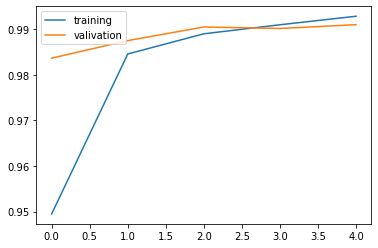

In [21]:
# 训练并验证模型
history = deep_model.fit(x_train_2, y_train, epochs=5,validation_split=0.1)      # 训练模型，epochs指的就是训练过程中数据将被“轮”多少次
deep_model.evaluate(x_test_2,  y_test, verbose=2) # 验证模型,verbose = 2 为每个epoch输出一行记录
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')

# 一个简单的全连接神经网络的API构建实现

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 11s 207us/sample - loss: 0.5345 - accuracy: 0.8549 - val_loss: 0.2776 - val_accuracy: 0.9263
Epoch 2/5
54000/54000 [==============================] - 13s 239us/sample - loss: 0.3550 - accuracy: 0.8972 - val_loss: 0.2483 - val_accuracy: 0.9318
Epoch 3/5
54000/54000 [==============================] - 11s 207us/sample - loss: 0.3352 - accuracy: 0.9039 - val_loss: 0.2371 - val_accuracy: 0.9355
Epoch 4/5
54000/54000 [==============================] - 10s 193us/sample - loss: 0.3239 - accuracy: 0.9070 - val_loss: 0.2330 - val_accuracy: 0.9368
Epoch 5/5
54000/54000 [==============================] - 11s 204us/sample - loss: 0.3191 - accuracy: 0.9094 - val_loss: 0.2296 - val_accuracy: 0.9353
10000/10000 - 1s - loss: 0.2757 - accuracy: 0.9230


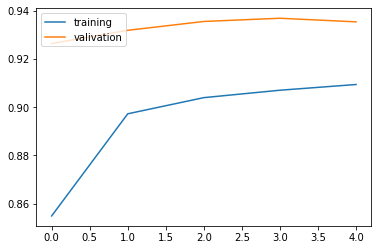

In [22]:
# 构造模型
input_x = tf.keras.Input(shape=(28,28))    # 输入是一个28*28的表
flattern_x = tf.keras.layers.Flatten()(input_x) # 展平
hidden1 = tf.keras.layers.Flatten(input_shape=(28, 28))(flattern_x)
hidden1_dropout = tf.keras.layers.Dropout(0.2)(hidden1)
pred = tf.keras.layers.Dense(10, activation='softmax')(hidden1_dropout)

model_api = tf.keras.Model(inputs=input_x, outputs=pred)  # 模型

# 编译模型
model_api.compile(optimizer='adam',                        # 优化器
              loss='sparse_categorical_crossentropy',  # 损失函数
              metrics=['accuracy'])

# 训练并验证模型
history =model_api.fit(x_train, y_train, epochs=5,validation_split=0.1)      # 训练模型，epochs指的就是训练过程中数据将被“轮”多少次
model_api.evaluate(x_test,  y_test, verbose=2) # 验证模型,verbose = 2 为每个epoch输出一行记录
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')

# LSTM 参数

keras.layers.recurrent.LSTM(units, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0)

如上是所有的参数
- units ： 输出维度
- input_dim ： 输入维度，
- return_sequences ： 是否返回整个序列，。若为True则返回整个序列，否则仅返回输出序列的最后一个输出
- input_length ： 当输入序列的长度固定时，该参数为输入序列的长度。当需要在该层后连接Flatten层，然后又要连接Dense层时，需要指定该参数，否则全连接的输出无法计算出来。

比如如下的代码

model = Sequential()    
model.add(LSTM(128, input_dim=64, input_length=5, return_sequences=True))  
model.add(LSTM(256, return_sequences=False))  

![](图片/LSTM例子1.png)  

1. 我们把输入的单词，转换为维度64的词向量，小矩形的数目即单词的个数input_length
2. 通过第一个LSTM中的Y=XW，这里输入为维度64，输出为维度128，而return_sequences=True，我们可以获得5个128维的词向量V1’…V5’
3. 通过第二个LSTM，此时输入为V1’…V5’都为128维，经转换后得到V1’’…V5’'为256维，最后因为return_sequences=False，所以只输出了最后一个红色的词向量


In [24]:
help(layers.LSTM)

Help on class LSTM in module tensorflow.python.keras.layers.recurrent_v2:

class LSTM(tensorflow.python.keras.layers.recurrent.DropoutRNNCellMixin, tensorflow.python.keras.layers.recurrent.LSTM)
 |  LSTM(units, activation='tanh', recurrent_activation='sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=2, return_sequences=False, return_state=False, go_backwards=False, stateful=False, time_major=False, unroll=False, **kwargs)
 |  
 |  Long Short-Term Memory layer - Hochreiter 1997.
 |  
 |  See [the Keras RNN API guide](https://www.tensorflow.org/guide/keras/rnn)
 |  for details about the usage of RNN API.
 |  
 |  Based on available runtime hardware and constraints, thi

# 引用

>[keras：4)LSTM函数详解](https://blog.csdn.net/jiangpeng59/article/details/77646186)